# Run the whole deltas algorithm

In [3]:
%load_ext autoreload
%autoreload 2

from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [4]:
N1 = 10000
N2 = 10
data_clf = pipe.data.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


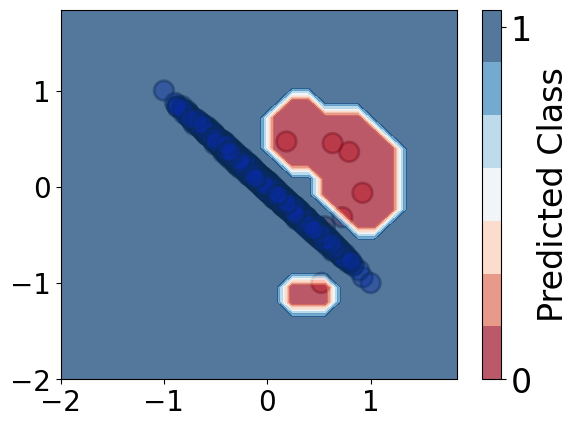

SMOTE


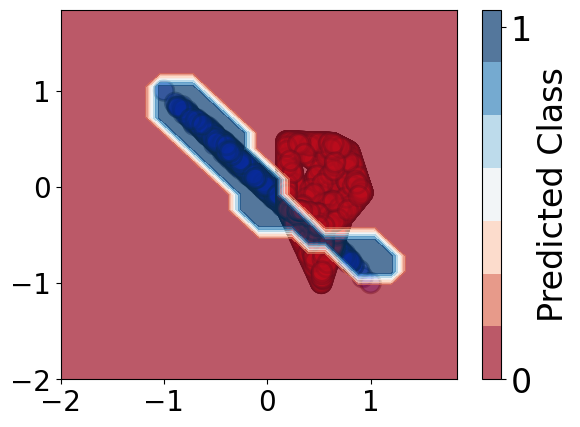

In [5]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'], clf_SMOTE = pipe.classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

## Fit deltas

Original Data


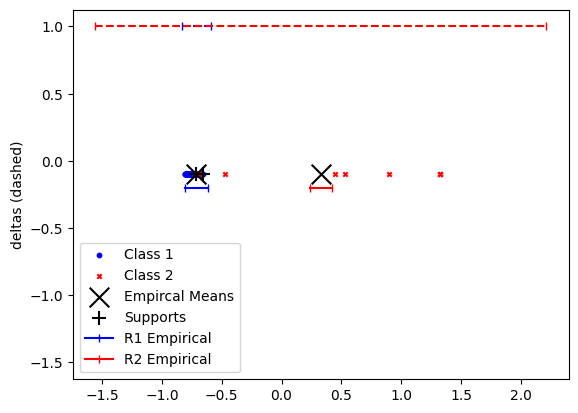

With budget 100000 have found 764 viable downsampled solutions
Best solution found by removing 214 data points
Downsampled Data:


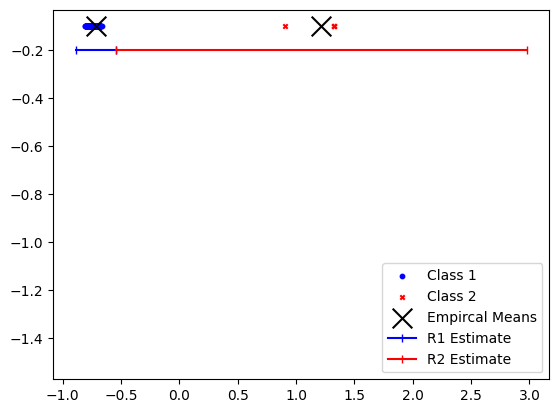

In [6]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(
    clf,
).fit(X, y, alpha=1000, _print=True, _plot=True, max_trials=100000, parallel=True)

## Show parameters

In [7]:
deltas_model.print_params()
deltas_model.print_deltas()

Parameters
                R:  1.3233843306167796
                N1: 9792
                N2: 4
                R1: 0.09519176631475923
                R2: 0.31580629918492675
                M:  1.520705153830174
                D:  1.9317032193298598
                C1: 1
                C2: 1
"
                  delta1: 0.0007999299929993 
                  delta2: 0.9836716840708478
                  constraint: 0.0
                  


# Evaluation on test data

original accuracy: 0.74265
SMOTE accuracy: 0.9071
deltas accuracy: 0.9272

original F1: 0.6534706793240422
SMOTE F1: 0.9038700331125828
deltas F1: 0.9214840379637619

original precision0: 0.6601967386281111
SMOTE precision0: 0.8814655172413793
deltas precision0: 0.8729050279329609

original precision1: 1.0
SMOTE precision1: 0.9364279588336192
deltas precision1: 1.0

original


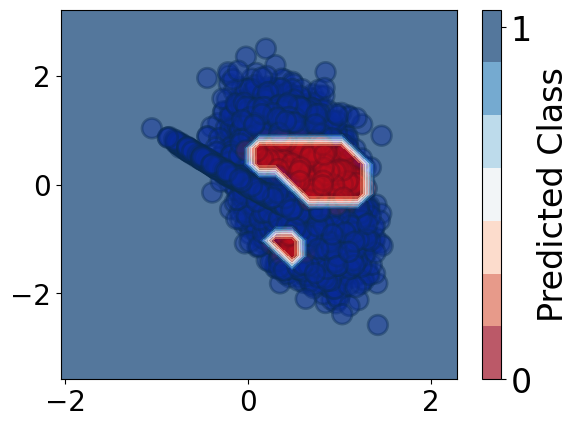

SMOTE


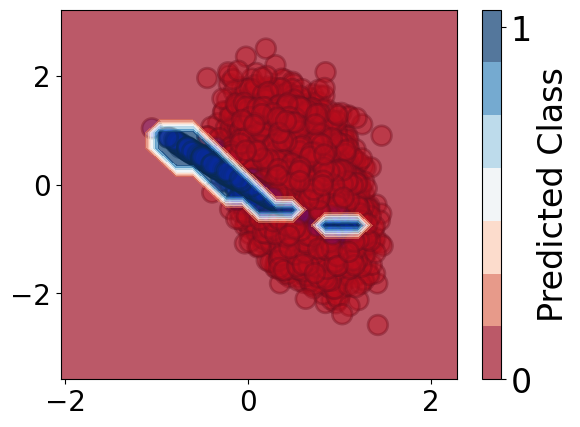

deltas


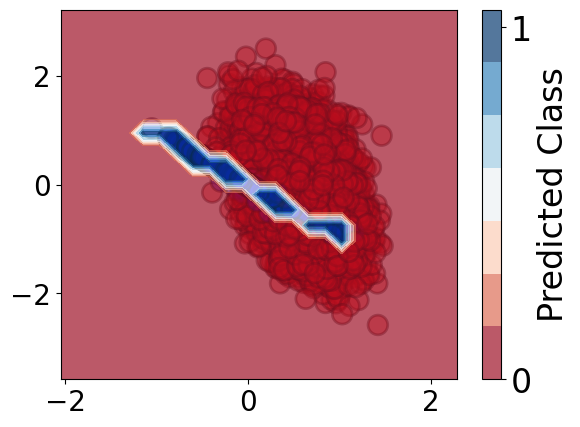

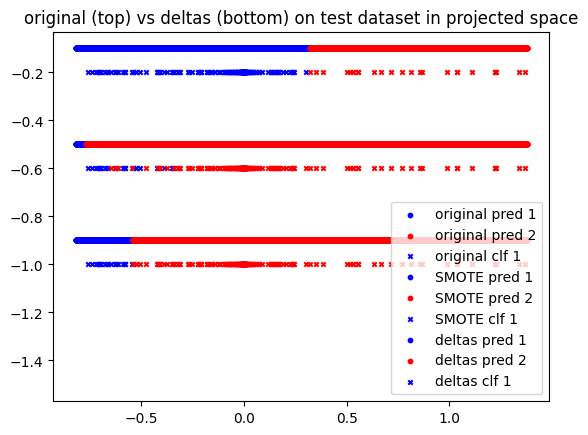

In [8]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
evaluation.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)